<a href="https://colab.research.google.com/github/EOL/computer-vision-with-EOL-images/blob/master/play_for_beginners/flower_generate_tags_yolov8_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Demo: Using YOLOv8 to add flower tags for Angiosperm (flowering plants) images
---
*Last Updated 18 February 2026*  
-Runs in Python 3 with YOLOv8-   

Using [YOLOv8 Nano](https://yolov8.com/) trained on [Open Images V7](https://docs.ultralytics.com/datasets/detect/open-images-v7) as a method to do customized, large-scale image tagging. EOL Angiosperm images will be tagged if flowers are present using object detection. Tags will further extend EOLv3 image search functions.

Notes:   
* Run code blocks by pressing play button in brackets on left
* Change parameters using form fields on right (find details at corresponding lines of code by searching '#@param')

References:   
* Code modified from the [Ultralytics YOLOv8 tutorial](https://docs.ultralytics.com/datasets/detect/open-images-v7)
* Check out the [Ultralytics YOLO repo](https://github.com/ultralytics/ultralytics) for more documetation and tutorials

## Installs & Imports
---

In [1]:
#@title Choose where to save results
import os

# Use dropdown menu on right
save = "in Colab runtime (files deleted after each session)" #@param ["in my Google Drive", "in Colab runtime (files deleted after each session)"]

# Mount google drive to export image tagging file(s)
if 'Google Drive' in save:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)

# Set up directory structure
basewd = "/content/drive/MyDrive/train"
cwd = basewd + '/' + 'yolov8'
if not os.path.exists(cwd):
    os.makedirs(cwd)
    os.chdir(cwd)
    os.makedirs('data/imgs')
    os.makedirs('data/img_info')
    os.makedirs('data/results')

%cd $cwd

/content


In [2]:
#@title Define model and functions
!uv pip install ultralytics
import ultralytics
ultralytics.checks()
import urllib.request
import cv2
import numpy as np
from ultralytics import YOLO
from matplotlib import pyplot as plt
import pandas as pd
import requests
import urllib3
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

# Load the pretrained model (YOLOv8 Nano trained on Open Images V7)
model = YOLO("yolov8n-oiv7.pt")

# Load an image from URL
def load_image_from_url(url):
    try:
        response = requests.get(url, timeout=10, verify=False)
        img_array = np.asarray(bytearray(response.content), dtype=np.uint8)
        img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
        if img is None:
            return None
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        return img
    except Exception as e:
        print(f"Failed to load image from {url}: {e}")
        return None

# Run inference on image, detect and draw tags of interest
def detect_and_draw_tags(image_url, tags=None):
    if tags is None:
        tags = ["flower", "fruit"]

    img = load_image_from_url(image_url)
    if img is None:
        print("Image load failed for image from:", image_url)
        return None, None, [image_url, None, '', '', '', '', '']

    results = model(img)
    if len(results) == 0 or len(results[0].boxes) == 0:
        print("No detections for image from:", image_url)
        return img, None, [image_url, None, '', '', '', '', '']

    tag = None
    predictions = [image_url, None, '', '', '', '', '']  # default
    img_copy = img.copy()

    for *box, conf, cls in results[0].boxes.data:
        class_name = model.names[int(cls)]
        if any(tag_name in class_name.lower() for tag_name in tags):
            tag = next(tag_name for tag_name in tags if tag_name in class_name.lower())
            print(f"Tag '{tag}' detected in image from: {image_url}")
            x1, y1, x2, y2 = map(int, box)
            width, height = x2 - x1, y2 - y1

            predictions = [image_url, tag, x1, y1, width, height, round(float(conf), 4)]

            cv2.rectangle(img_copy, (x1, y1), (x2, y2), color=(255, 0, 255), thickness=2)
            label = f"{tag} {conf:.2f}"
            (w, h), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.6, 1)
            cv2.rectangle(img_copy, (x1, y1 - 20), (x1 + w, y1), (255, 0, 255), -1)
            cv2.putText(img_copy, label, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 1)

    if not tag:
        print(f"No {tags} detected in image from: {image_url}")

    return img_copy, tag, predictions

Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.9.0+cpu CPU (Intel Xeon CPU @ 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 21.2/225.8 GB disk)


## Run inference - Detect flowers in images
---


0: 448x640 2 Flowers, 1 Plant, 397.2ms
Speed: 6.4ms preprocess, 397.2ms inference, 42.1ms postprocess per image at shape (1, 3, 448, 640)
Tag 'flower' detected in image from: https://content.eol.org/data/media/a1/83/1d/913.67951.jpg
Tag 'flower' detected in image from: https://content.eol.org/data/media/a1/83/1d/913.67951.jpg


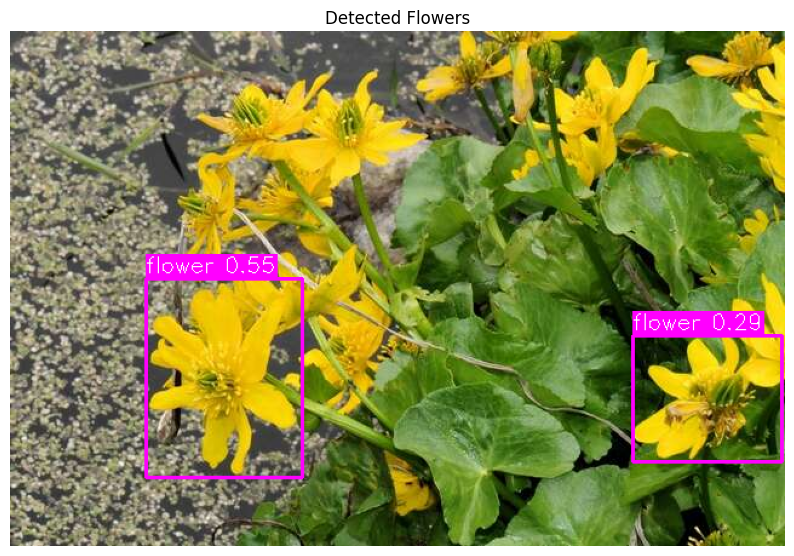

Image with bounding boxes saved to to: /data/results/913.67951_w_bboxes.jpg


In [7]:
#@title Find flowers in images from URL

# TO DO: Choose a URL from the dropdown menu to the right or enter your own URL
image_url = "https://content.eol.org/data/media/a1/83/1d/913.67951.jpg" # @param ["https://content.eol.org/data/media/63/8d/cf/18.51222129f0d46f4ff5b31704904752f0.jpg","https://content.eol.org/data/media/9d/d8/64/851.126960-5_jpg.580x360.jpg","https://content.eol.org/data/media/a1/83/1d/913.67951.jpg","https://content.eol.org/data/media/a1/7c/66/913.63779.jpg","https://content.eol.org/data/media/a1/9f/76/913.8115.580x360.jpg"] {"allow-input":true}
img_with_boxes, tag, predictions = detect_and_draw_tags(image_url)

# Plot detections on image
plt.figure(figsize=(10, 10))
plt.imshow(img_with_boxes)
plt.axis('off')
plt.title("Detected Flowers")
plt.show()

# Convert back to BGR for saving with OpenCV
img_bgr = cv2.cvtColor(img_with_boxes, cv2.COLOR_RGB2BGR)

# Define filename
fname = os.path.splitext(image_url.split("/")[-1].split("?")[0])[0]  # Get name from URL
fname = fname + "_w_bboxes.jpg"

# Save image
outfpath = os.path.join('/data/results', fname)
cv2.imwrite(outfpath, img_bgr)
print(f"Image with bounding boxes saved to to: {outfpath}")

## Export detections to .tsv file for tagging
---

In [8]:
#@title Run inference on multiple URLs and save results to tsv

# Define URLs for inference
urls = ["https://content.eol.org/data/media/63/8d/cf/18.51222129f0d46f4ff5b31704904752f0.jpg",
      "https://content.eol.org/data/media/9d/d8/64/851.126960-5_jpg.580x360.jpg",
      "https://content.eol.org/data/media/a1/83/1d/913.67951.jpg",
      "https://content.eol.org/data/media/a1/7c/66/913.63779.jpg",
      "https://content.eol.org/data/media/a1/9f/76/913.8115.580x360.jpg"] # TO DO: Use your own URL's for inference

# Loop through URLs and run inference
all_predictions = []
for url in urls:
    img_with_boxes, tag, predictions = detect_and_draw_tags(url)
    all_predictions.append(predictions)

# Save rseults/bounding boxes to file
df_preds = pd.DataFrame(all_predictions, columns=["url", "tag", "xmin", "ymin", "bbox_w", "bbox_h", "confidence"])
outfpath = os.path.join('data/results/' 'angiosperm_flower_tag_predictions.tsv')
df_preds.to_csv(outfpath, sep='\t', index=False)
print(f"Predictions saved to: {outfpath}")


0: 480x640 6 Flowers, 268.1ms
Speed: 11.3ms preprocess, 268.1ms inference, 6.1ms postprocess per image at shape (1, 3, 480, 640)
Tag 'flower' detected in image from: https://content.eol.org/data/media/63/8d/cf/18.51222129f0d46f4ff5b31704904752f0.jpg
Tag 'flower' detected in image from: https://content.eol.org/data/media/63/8d/cf/18.51222129f0d46f4ff5b31704904752f0.jpg
Tag 'flower' detected in image from: https://content.eol.org/data/media/63/8d/cf/18.51222129f0d46f4ff5b31704904752f0.jpg
Tag 'flower' detected in image from: https://content.eol.org/data/media/63/8d/cf/18.51222129f0d46f4ff5b31704904752f0.jpg
Tag 'flower' detected in image from: https://content.eol.org/data/media/63/8d/cf/18.51222129f0d46f4ff5b31704904752f0.jpg
Tag 'flower' detected in image from: https://content.eol.org/data/media/63/8d/cf/18.51222129f0d46f4ff5b31704904752f0.jpg

0: 576x640 (no detections), 453.4ms
Speed: 6.1ms preprocess, 453.4ms inference, 6.9ms postprocess per image at shape (1, 3, 576, 640)
No detect